## Creating a dataset

In [46]:
# importing libraries

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [47]:
# empty list

train_labels = []
train_samples = []

Example data:
- An experimental data was tested on individuals from 13 to 100in a clinical trial
- The trial has 2100 participants. Half were under 65 years and the other half were above 65
- Around 95% of patients 65 or older experienced side effects
- Around 95% of patients under 65 experienced no side effects

In [48]:
# generating the experimental dataset

for i in range(50):
  # 5% of younger patients who experienced side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # 5% of older patients who did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # 95% of younger patients who experienced no side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # 95% of older patients who experienced side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)


In [49]:
df = pd.DataFrame(data=[train_samples,train_labels]).T

In [50]:
# showing in dataframe
df.columns = ['Age', 'experienced side effect']
df.head()

,Age,experienced side effect
0,47,1
1,87,0
2,16,1
3,65,0
4,26,1


In [51]:
# transforming into numpy array
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

# shuffling the data
train_labels, train_samples = shuffle(train_labels, train_samples)

In [52]:
# scalaing the data in the range 0 to 1

scalar = MinMaxScaler(feature_range=(0,1))

In [53]:
# This data is in 1D and if we need to pass it through a network it should alteast be 2D, hence reshaping
train_samples.shape

(2100,)

In [54]:
# we need to reshape -1 represent the same shape and 1 represent we are adding 1 new dimension
train_samples.reshape(-1,1)

array([[80],
       [97],
       [72],
       ...,
       [71],
       [27],
       [72]])

In [55]:
# scaling, reshaping and fitting the data
# also we need to reshape the data to pass it through the fit transform function

scaled_train_examples = scalar.fit_transform(train_samples.reshape(-1,1))

In [56]:
# Now the shape is in 2D
scaled_train_examples.shape

(2100, 1)

In [57]:
scaled_train_examples

array([[0.77011494],
       [0.96551724],
       [0.67816092],
       ...,
       [0.66666667],
       [0.16091954],
       [0.67816092]])

## Creating a simple NN

In [58]:
# lets create a ANN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy

In [59]:
# Checking for GPU

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("number of GPU available: ", len(physical_devices))

# code to set the GPU
#tf.config.experimental.set_memory_growth(physical_devices, True)

number of GPU available:  0


In [60]:
# defining the model
# Dense means a fully connected layer
# We use multiple Dense layers to specify the number of fully connect layers with its respective neurons and activations

model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [61]:
# checking for the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [62]:
# compiling the model for backprogation and setting the optimizers for learning and loss and the required metrics

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
# fitting the model
# batch size represent how many sample are included to be processed in batches at a time, 
# so the total samples are divided into 10 batches in this case
# epochs represents that the model will be trained 30 times 
# shuffle is to shuffle the data
# verbose is to see the output when the model is training, we can set verbose to 0 , 1 or 2

model.fit(x=scaled_train_examples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6671 - accuracy: 0.5590 - 805ms/epoch - 4ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6453 - accuracy: 0.6752 - 243ms/epoch - 1ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6203 - accuracy: 0.7471 - 241ms/epoch - 1ms/step
Epoch 4/30
210/210 - 0s - loss: 0.5943 - accuracy: 0.7767 - 241ms/epoch - 1ms/step
Epoch 5/30
210/210 - 0s - loss: 0.5673 - accuracy: 0.7914 - 253ms/epoch - 1ms/step
Epoch 6/30
210/210 - 0s - loss: 0.5386 - accuracy: 0.8181 - 235ms/epoch - 1ms/step
Epoch 7/30
210/210 - 0s - loss: 0.5093 - accuracy: 0.8343 - 226ms/epoch - 1ms/step
Epoch 8/30
210/210 - 0s - loss: 0.4802 - accuracy: 0.8524 - 232ms/epoch - 1ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4520 - accuracy: 0.8648 - 239ms/epoch - 1ms/step
Epoch 10/30
210/210 - 0s - loss: 0.4255 - accuracy: 0.8786 - 249ms/epoch - 1ms/step
Epoch 11/30
210/210 - 0s - loss: 0.4013 - accuracy: 0.8914 - 231ms/epoch - 1ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3799 - accuracy: 0.8929 - 226ms/epoch - 1ms/step
E

In [ ]:
# To check the generalization we have to test the trained model on unseen data we need pass a validation set

# We can create validation set in 2 ways, one as a complete external dataset and the other way is to split a portion of the training dataset

# method 1 (passing a seperate data)
model.fit(x=scaled_train_examples, y=train_labels, validation_data= valid_data ,batch_size=10, epochs=30, shuffle=True, verbose=2)

# method 2 (splitting the training dataset)
model.fit(x=scaled_train_examples, y=train_labels, validation_split= 0.1 ,batch_size=10, epochs=30, shuffle=True, verbose=2)


#### Using Validation set

In [63]:
# we will be using 2nd method for this experiment
# while using the validation split we need to shuffle the data first else only the last 10% of the data would be considered in this case
# We have to shuffle the data before fitting the data to the model

model.fit(x=scaled_train_examples, y=train_labels, validation_split= 0.1 ,batch_size=10, epochs=30, shuffle=True, verbose=2)


Epoch 1/30
189/189 - 1s - loss: 0.6902 - accuracy: 0.4646 - val_loss: 0.6769 - val_accuracy: 0.5190 - 728ms/epoch - 4ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6609 - accuracy: 0.6026 - val_loss: 0.6505 - val_accuracy: 0.5714 - 258ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6335 - accuracy: 0.6354 - val_loss: 0.6261 - val_accuracy: 0.6476 - 265ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6075 - accuracy: 0.6868 - val_loss: 0.6008 - val_accuracy: 0.6619 - 245ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5803 - accuracy: 0.7296 - val_loss: 0.5743 - val_accuracy: 0.7048 - 260ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5538 - accuracy: 0.7593 - val_loss: 0.5466 - val_accuracy: 0.7524 - 250ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5224 - accuracy: 0.7926 - val_loss: 0.5142 - val_accuracy: 0.8333 - 243ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4922 - accuracy: 0.8196 - val_loss: 0.4838 - val_accuracy: 0.8381 - 243ms/epoch - 1ms/step


#### Creating and Using test set for model inference

In [ ]:
# following the same example to create the test data

In [64]:
# empty test list

test_labels = []
test_samples = []


# generating the experimental dataset

for i in range(50):
  # 5% of younger patients who experienced side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # 5% of older patients who did not experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(1000):
  # 95% of younger patients who experienced no side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # 95% of older patients who experienced side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)



# transforming into numpy array
test_labels = np.array(train_labels)
test_samples = np.array(train_samples)

# shuffling the data
test_labels, test_samples = shuffle(test_labels, test_samples)


# scalaing the data in the range 0 to 1
scalar = MinMaxScaler(feature_range=(0,1))


# scaling, reshaping and fitting the data
# also we need to reshape the data to pass it through the fit transform function
scaled_test_examples = scalar.fit_transform(test_samples.reshape(-1,1))

### Predict / Inference

In [65]:
# we need to use the same batch size for predictions that we used for training
# verbose is 0 to get no output

predictions = model.predict(x= scaled_test_examples, batch_size=10, verbose=0)

In [ ]:
# In this case [0.9033693  0.09663066], in the form [0 , 1]
#the model tells 90.33% of probability that the person does not have sideeffect and 9.6% of probability that he has a sideeffect

for i in predictions():
  print(i)

In [69]:
# to get the highest probable prediction we can run argmax,

rounded_predictions = np.argmax(predictions, axis=-1)

In [70]:
rounded_predictions

array([0, 0, 1, ..., 0, 0, 1])

#### Confusion matrix

In [71]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [72]:
# built in function to build the confusion matrix
# y_true is the known labels and y_pred is the predicted labels

cm = confusion_matrix(y_true= test_labels, y_pred= rounded_predictions)

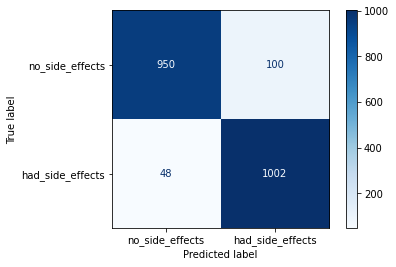

In [74]:
# code to plot the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no_side_effects', 'had_side_effects'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

### Saving the model

In [75]:
# checking the model path and saving it
# saves all the weights

import os.path

if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

In [76]:
# Loading the model

from tensorflow.keras.models import load_model

new_model = load_model('models/medical_trial_model.h5')

In [77]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [78]:
# checking the weights

new_model.get_weights()

[array([[-0.19831261, -0.3535055 ,  0.06443538, -0.07937759,  0.46293327,
         -0.0623337 , -0.25150448, -0.00314897, -0.12273343,  0.42212453,
          0.4475469 ,  0.3661439 ,  0.7441649 , -0.2045488 ,  0.55753696,
         -0.15590507]], dtype=float32),
 array([ 0.        ,  0.        ,  0.26459566,  0.        , -0.1339832 ,
         0.        ,  0.        ,  0.        ,  0.16704386, -0.07630388,
        -0.13442123, -0.11302488, -0.11903106,  0.        , -0.12587428,
         0.        ], dtype=float32),
 array([[-1.54108256e-01, -2.90638089e-01, -1.60395220e-01,
          8.95375013e-03,  1.80596799e-01, -1.30255342e-01,
          3.47052723e-01, -1.28869295e-01, -7.76060820e-02,
          1.14806592e-01, -7.79382885e-02,  2.59027779e-02,
          2.83868223e-01, -1.32560939e-01,  6.30408525e-03,
          1.42041862e-01,  1.87512904e-01,  1.98795468e-01,
          2.43600696e-01,  3.34640890e-01,  1.55089468e-01,
         -1.17166132e-01, -1.75384164e-01,  1.39096975e-01,
 

In [80]:
# checking the optimizer

new_model.optimizer

### saving only model architechture to json

---



In [81]:
# saves as json
json_model = model.to_json()
json_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [83]:
# reconstructing model from json

from tensorflow.keras.models import model_from_json
model_architechture = model_from_json(json_model)
model_architechture.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Saving weights

In [86]:
# checking the model path and saving it
# saves all the weights

import os.path

if os.path.isfile('models/medical_trial_model_weights.h5') is False:
  model.save_weights('models/medical_trial_model_weights.h5')

In [87]:
# to be able to use the weights we need to construct the model first

model2 = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [88]:
# loading the weights 
# remember that the architechture should be the same when defining the weights 
# This should be done because the weights and the neurons should be able to map to each other

model2.load_weights('models/medical_trial_model_weights.h5')

In [89]:
# get the weights
model2.get_weights()

[array([[-0.19831261, -0.3535055 ,  0.06443538, -0.07937759,  0.46293327,
         -0.0623337 , -0.25150448, -0.00314897, -0.12273343,  0.42212453,
          0.4475469 ,  0.3661439 ,  0.7441649 , -0.2045488 ,  0.55753696,
         -0.15590507]], dtype=float32),
 array([ 0.        ,  0.        ,  0.26459566,  0.        , -0.1339832 ,
         0.        ,  0.        ,  0.        ,  0.16704386, -0.07630388,
        -0.13442123, -0.11302488, -0.11903106,  0.        , -0.12587428,
         0.        ], dtype=float32),
 array([[-1.54108256e-01, -2.90638089e-01, -1.60395220e-01,
          8.95375013e-03,  1.80596799e-01, -1.30255342e-01,
          3.47052723e-01, -1.28869295e-01, -7.76060820e-02,
          1.14806592e-01, -7.79382885e-02,  2.59027779e-02,
          2.83868223e-01, -1.32560939e-01,  6.30408525e-03,
          1.42041862e-01,  1.87512904e-01,  1.98795468e-01,
          2.43600696e-01,  3.34640890e-01,  1.55089468e-01,
         -1.17166132e-01, -1.75384164e-01,  1.39096975e-01,
 